## ViTs can also be used for object detection.
From the images in our file system we will be performing edge detection using the transformers package with DetrImageProcessor, and DetrForObjectDetection

In [1]:
from PIL import Image, ImageDraw
from transformers import DetrForObjectDetection, DetrImageProcessor
import torch
import matplotlib.pyplot as plt

/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fs_images = [
    "../images/apple.jpg",
    "../images/sparrow.jpg",
    "../images/sunset.jpg",
    "../images/test_monkey.jpg"
]



In [3]:
model_name = "facebook/detr-resnet-50"
feature_extractor = DetrImageProcessor.from_pretrained(model_name)
model = DetrForObjectDetection.from_pretrained(model_name)

/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/torch/nn/modules/m

In [4]:
images = []

for single_image in fs_images:
    image = Image.open(single_image).convert("RGB")
    images.append(image)
    
inputs = feature_extractor(images=images, return_tensors = "pt")

In [5]:
with torch.no_grad():
    outputs = model(**inputs)
    

In [17]:
def draw_boxes(image, boxes, labels):
    draw = ImageDraw.Draw(image)
    for box, label in zip(boxes, labels):
        draw.rectangle(box, outline="red", width=20)
        draw.text((box[0], box[1]), label, fill="red")

In [18]:
processed_images = []
target_sizes = [(image.height, image.width) for image in images]
results = feature_extractor.post_process_object_detection(outputs, target_sizes=target_sizes)

In [19]:
for image, result in zip(images, results):
    keep = result["scores"] > 0.9
    boxes = result["boxes"][keep].tolist()
    labels = [model.config.id2label[label] for label in result["labels"][keep].tolist()]
    image_with_boxes = image.copy()
    draw_boxes(image_with_boxes, boxes, labels)
    processed_images.append(image_with_boxes)

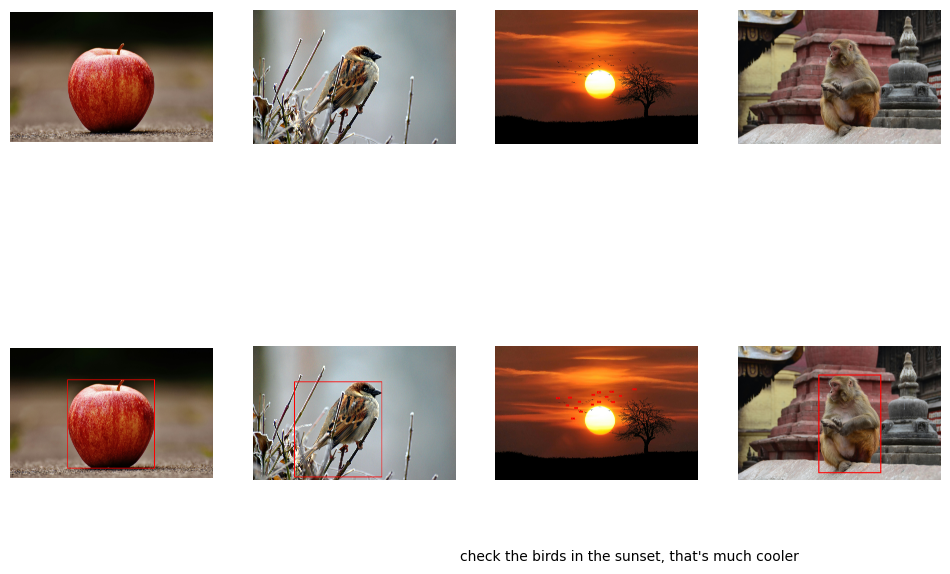

In [24]:
fig, axs = plt.subplots(2, len(images), figsize = (12, 8))

for i, (original_image, processed_image) in enumerate(zip(images, processed_images)):
    axs[0,i].imshow(original_image)
    axs[0,i].axis("off")
    
    axs[1,i].imshow(processed_image)
    axs[1,i].axis("off")
    
plt.figtext(0.50, 0.1,"check the birds in the sunset, that's much cooler")
plt.show()